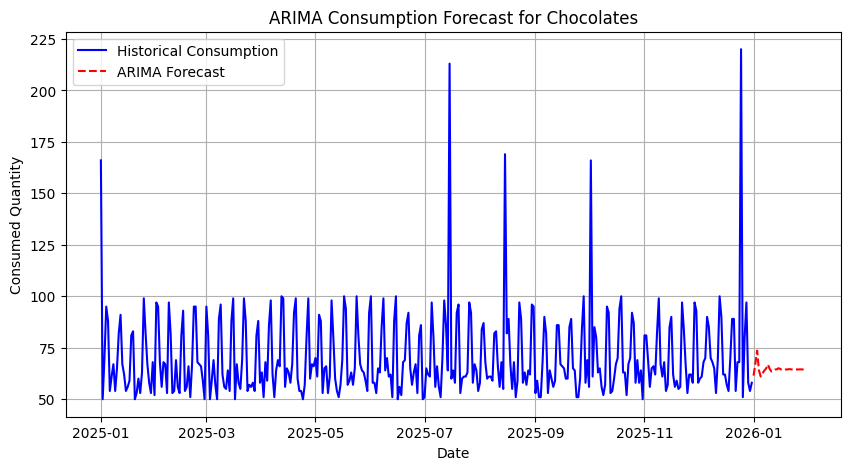

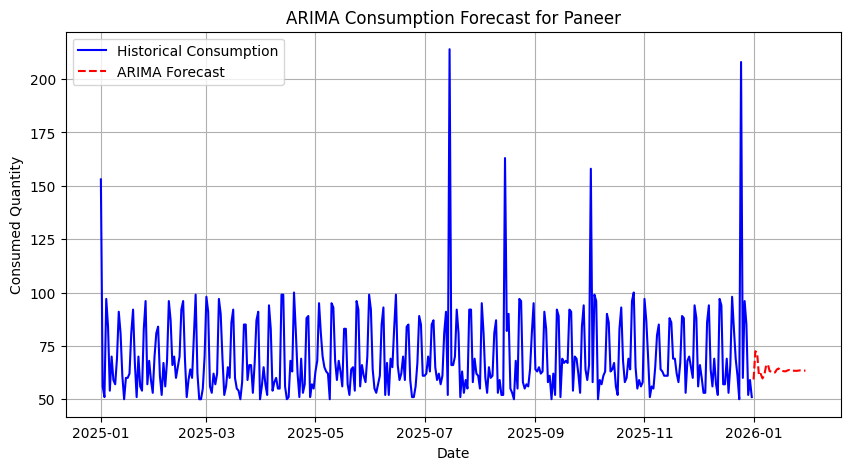

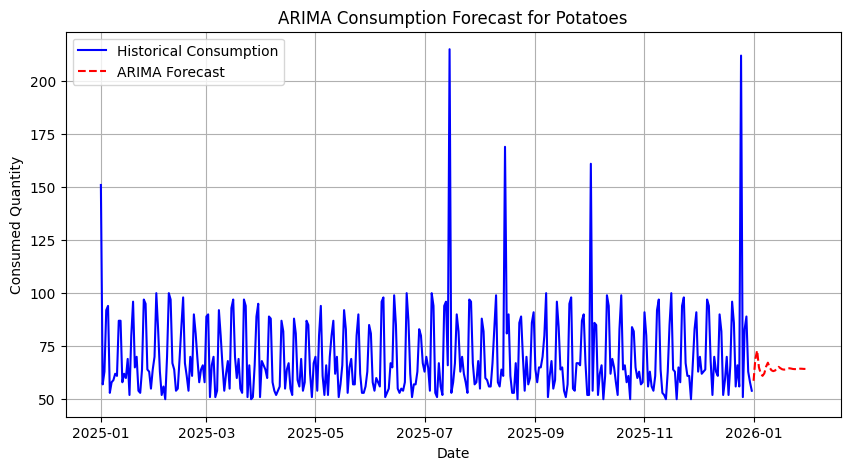

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
file_path = "consumption_data_2025.xlsx"
df = pd.read_excel(file_path)

# Convert date column to datetime format
df['consumption_date'] = pd.to_datetime(df['consumption_date'])

# Aggregate consumption per item per day
df_grouped = df.groupby(['consumption_date', 'item'])['consumed_quantity'].sum().reset_index()

# Get unique items for forecasting
unique_items = df_grouped['item'].unique()

# Define forecast horizon (e.g., 30 days ahead)
forecast_horizon = 30

# Store ARIMA results
arima_forecast_results = {}

# Loop through each item to create ARIMA forecasts
for item in unique_items:
    # Filter data for the current item
    item_data = df_grouped[df_grouped['item'] == item][['consumption_date', 'consumed_quantity']]
    item_data = item_data.set_index('consumption_date').asfreq('D').fillna(0)
    
    # ARIMA Model
    arima_model = ARIMA(item_data['consumed_quantity'], order=(5,1,0))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=forecast_horizon)
    
    # Store results
    arima_forecast_results[item] = arima_forecast

    # Plot ARIMA forecasts
    plt.figure(figsize=(10, 5))
    plt.plot(item_data.index, item_data['consumed_quantity'], label='Historical Consumption', color='blue')
    plt.plot(arima_forecast.index, arima_forecast.values, label='ARIMA Forecast', linestyle='dashed', color='red')
    plt.title(f'ARIMA Consumption Forecast for {item}')
    plt.xlabel('Date')
    plt.ylabel('Consumed Quantity')
    plt.legend()
    plt.grid()
    plt.show()

# Convert results to DataFrame
arima_forecast_df = pd.DataFrame.from_dict(arima_forecast_results, orient='index').transpose()

# Save forecast results to CSV
arima_forecast_df.to_csv("arima_forecast_results.csv", index=False)
